In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("CARGO_FOTP_DATASET.xlsx")

In [3]:
df=data.copy()

### GOAL : 
* Delay Prediction for cargo flights, Metric : %95 


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FLT_NO               99546 non-null  object
 1   ACT_CUS_FLE          99546 non-null  object
 2   FLEET                99546 non-null  object
 3   FLEET_FAM            99546 non-null  object
 4   FLEET_FAM_GRP        99546 non-null  object
 5   FLEET_BODY_TYP       99546 non-null  object
 6   FLT_TYP              99546 non-null  object
 7   LEG_DEP_AP           99546 non-null  object
 8   LEG_DEP_GMT_DT       99546 non-null  int64 
 9   LEG_DEP_GMT_TM       99546 non-null  int64 
 10  LEG_DEP_CNTRY_COD    99512 non-null  object
 11  LEG_DEP_RGN_COD      95771 non-null  object
 12  LEG_ARR_AP           99546 non-null  object
 13  LEG_ARR_GMT_DT       99546 non-null  int64 
 14  LEG_ARR_GMT_TM       99546 non-null  int64 
 15  LEG_ARR_CNTRY_COD    99512 non-null  object
 16  LEG_

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,NaN,?,?,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210516,1209,...,NaN,NaN,NaN,?,?,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210519,1528,...,NaN,NaN,NaN,?,?,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210523,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0


In [5]:
df.describe()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
count,9.954600e+04,99546.000000,9.954600e+04,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000
mean,2.019249e+07,1201.375203,2.019250e+07,1208.110803,112.058486,12.377192,2.249915,0.353264,127.038856
std,1.289824e+04,668.607877,1.289884e+04,666.799934,277.712802,67.957361,24.556694,8.632271,297.532552
min,2.017010e+07,0.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.018083e+07,618.000000,2.018083e+07,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019112e+07,1235.000000,2.019112e+07,1226.000000,14.000000,0.000000,0.000000,0.000000,20.000000
75%,2.020093e+07,1757.000000,2.020093e+07,1757.000000,94.000000,7.000000,0.000000,0.000000,116.000000
max,2.021063e+07,2359.000000,2.021070e+07,2359.000000,7596.000000,5362.000000,2880.000000,1159.000000,7596.000000


<AxesSubplot:>

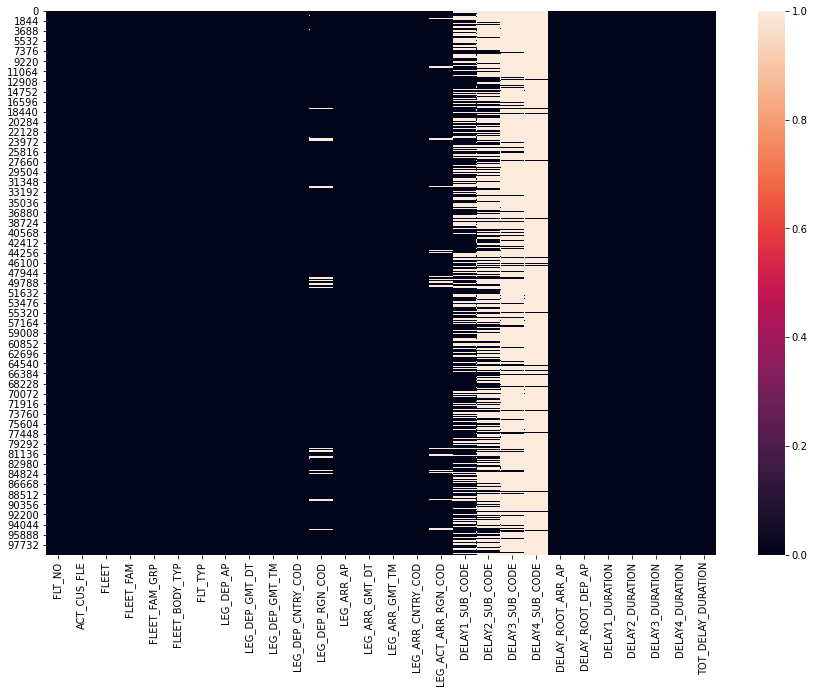

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [7]:
df.isna()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99541,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99542,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99543,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99544,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


### HEDEF
* Ayları mevsimsel olarak kodlama
* Saatleri gün dilimlerine bölme (06-12 sabah, öğle, akşam, gece )
* Hedef değişkenini oluşturma 
* Encoding 
* X_train, X_test 



In [11]:
#for col in df.select_dtypes('object'):
#    plt.figure(figsize = (12, 7))
#    sns.distplot(df[col], label= col)
#plt.legend()

In [12]:
df['DELAYED'] = [1 if x>0 else 0 for x in df['TOT_DELAY_DURATION']]

In [13]:
df["LEG_DEP_GMT_DT"] = pd.to_datetime(df["LEG_DEP_GMT_DT"],format='%Y%m%d') 

In [14]:
df['LEG_DEP_GMT_DT'] = df['LEG_DEP_GMT_DT'].apply(lambda time: time.month)

In [15]:
df["LEG_ARR_GMT_DT"] = pd.to_datetime(df["LEG_ARR_GMT_DT"],format='%Y%m%d') 

In [16]:
df['LEG_ARR_GMT_DT'] = df['LEG_ARR_GMT_DT'].apply(lambda time: time.month)

In [17]:
df.shape

(99546, 29)

Target Variable : Delay 
Size : (99546, 29)
Variables: object -->19, int64 -->10
Missing Values 

<AxesSubplot:ylabel='None'>

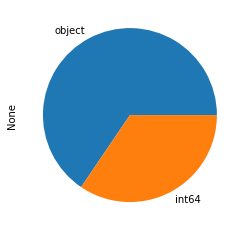

In [18]:
df.dtypes.value_counts().plot.pie()

In [19]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

FLT_NO                 0.000000
DELAY4_DURATION        0.000000
DELAY3_DURATION        0.000000
DELAY2_DURATION        0.000000
DELAY1_DURATION        0.000000
DELAY_ROOT_DEP_AP      0.000000
DELAY_ROOT_ARR_AP      0.000000
TOT_DELAY_DURATION     0.000000
LEG_ARR_GMT_DT         0.000000
LEG_ARR_AP             0.000000
LEG_ARR_GMT_TM         0.000000
DELAYED                0.000000
LEG_DEP_GMT_TM         0.000000
LEG_DEP_GMT_DT         0.000000
LEG_DEP_AP             0.000000
ACT_CUS_FLE            0.000000
FLEET                  0.000000
FLEET_FAM              0.000000
FLEET_FAM_GRP          0.000000
FLT_TYP                0.000000
FLEET_BODY_TYP         0.000000
LEG_ARR_CNTRY_COD      0.000342
LEG_DEP_CNTRY_COD      0.000342
LEG_DEP_RGN_COD        0.037922
LEG_ACT_ARR_RGN_COD    0.037942
DELAY1_SUB_CODE        0.363119
DELAY2_SUB_CODE        0.638891
DELAY3_SUB_CODE        0.898077
DELAY4_SUB_CODE        0.984570
dtype: float64

In [20]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.6]]

In [21]:
df.shape

(99546, 26)

### Visualisation of Target Variable 
* %63 delayed 
* %36 non delayed 
* data well balanced

In [22]:
df["DELAYED"].value_counts(normalize=True)

1    0.636881
0    0.363119
Name: DELAYED, dtype: float64

Histogramme 

In [24]:
#for col in df.select_dtypes('int64'):
#    plt.figure(figsize = (12, 7))
#    sns.distplot(df[col], label= col)
#    plt.legend()

In [25]:
#sns.pairplot(df,kind='hist')

In [26]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50}{df[col].nunique()}')

FLT_NO--------------------------------------------712
ACT_CUS_FLE---------------------------------------29
FLEET---------------------------------------------17
FLEET_FAM-----------------------------------------10
FLEET_FAM_GRP-------------------------------------8
FLEET_BODY_TYP------------------------------------2
FLT_TYP-------------------------------------------2
LEG_DEP_AP----------------------------------------202
LEG_DEP_CNTRY_COD---------------------------------111
LEG_DEP_RGN_COD-----------------------------------10
LEG_ARR_AP----------------------------------------203
LEG_ARR_CNTRY_COD---------------------------------111
LEG_ACT_ARR_RGN_COD-------------------------------10
DELAY1_SUB_CODE-----------------------------------353
DELAY_ROOT_ARR_AP---------------------------------76
DELAY_ROOT_DEP_AP---------------------------------65


In [27]:
#for col in df.select_dtypes('object'):
#    plt.figure()
#    df[col].value_counts().plot.pie()

In [28]:
df_delayed=df[df['DELAYED']==1]
df_nondelayed=df[df['DELAYED']==0]

In [24]:
df_delayed.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
5,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1717,...,FE,64D,?,?,107,0,0,0,107,1
7,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2208,...,FE,93Z,?,?,25,13,5,0,43,1
9,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2137,...,FE,89Z,?,?,12,0,0,0,12,1
10,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,209,...,FE,56B,?,?,77,7,0,0,84,1
11,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2145,...,FE,89Z,?,?,20,0,0,0,20,1


In [31]:
df.drop(["FLT_NO"], axis=1, inplace=True)

In [32]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,TR,...,FE,NaN,?,?,0,0,0,0,0,0
1,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1526,TR,...,FE,NaN,?,?,0,0,0,0,0,0
2,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1209,TR,...,FE,NaN,?,?,0,0,0,0,0,0
3,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1528,TR,...,FE,NaN,?,?,0,0,0,0,0,0
4,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,TR,...,FE,NaN,?,?,0,0,0,0,0,0


In [25]:
#df["LEG_DEP_GMT_TM"] = pd.to_datetime(df["LEG_DEP_GMT_TM"],format='%H%m') 
#df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda time: time.hour)

In [26]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,...,FE,NaN,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1526,...,FE,NaN,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1209,...,FE,NaN,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1528,...,FE,NaN,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,...,FE,NaN,?,?,0,0,0,0,0,0


In [27]:
#df['LEG_DEP_GMT_TM_H'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x.split(str(df['LEG_DEP_GMT_TM']),2))

In [34]:
df['LEG_ARR_GMT_TM'] = df['LEG_ARR_GMT_TM'].apply(lambda x: x//100)

In [35]:
df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x//100)

In [36]:
df.tail()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
99541,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,2,5,HK,...,FE,01C,?,?,119,0,0,0,119,1
99542,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,4,HK,...,FE,01C,?,?,56,0,0,0,56,1
99543,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,HK,...,FE,93Z,?,?,20,0,0,0,20,1
99544,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,6,HK,...,FE,01C,?,?,215,6,0,0,221,1
99545,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,HK,...,FE,93Z,?,?,45,0,0,0,45,1


In [37]:
#df=df.drop('LEG_DEP_GMT_TM_H',inplace=True,axis=1)

<AxesSubplot:>

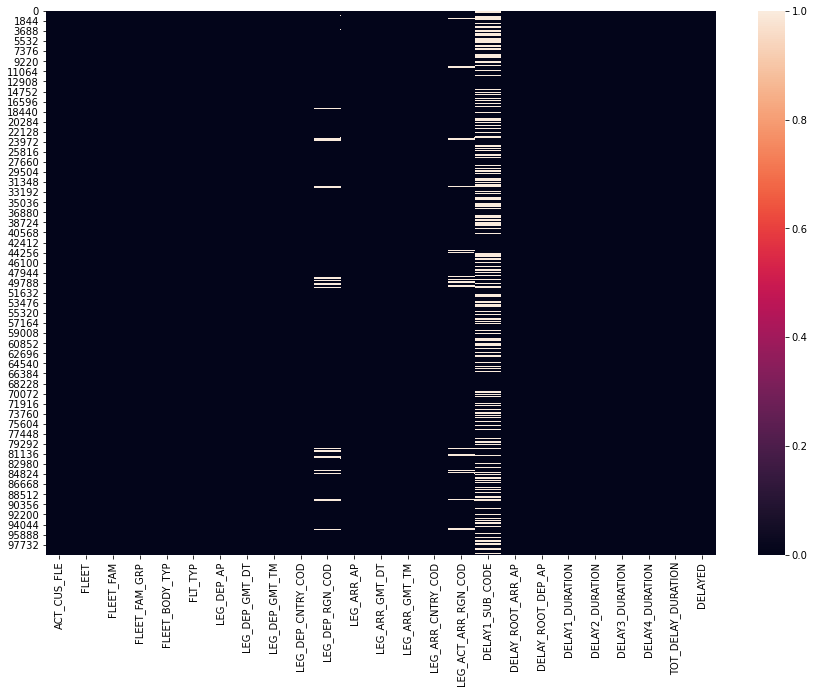

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [39]:
df['DELAY1_SUB_CODE'].nunique()

353

In [40]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', '93Z', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       '31P', '22E', '22C', '57F', '89K', '65Z', '62D', '63J', '41A',
       '36B', '32A', '31B', '87Y', '31A', '31E', '42A', '55O', '31C',
       '99A', '21E', '32E', '26C', '72R', '37D', '68G', '63A', '68B',
       '41Q', '55A', '63D', '66H', '85F', '39F', '31D', '66A', '77B',
       '23A', '71R', '45D', '65Y', '61D', '04A', '21A', '41N', '62M',
       '35F', '46N', '31N', '68S', '63C', '92B', '96C', '13M', '36C',
       '51C', '86G', '95B', '63B', '86C', '37E', '95A', '35E', '65E',
       '63K', '86F', '51J', '86B', '63H', '09A', '61F', '88E', '67E',
       '21C', '64E', '02A', '58B', '65C', '62E', '51N', '93X', '36D',
       '81Z', '68D', '88D', '26A', '51B', '83R', '64B', '22A', '98F',
       '03A', '58A', '31S', '86J', '17X', '24A', '89X', '31H', '85Q',
       '67B', '87W', '22B', '32C', '89T', '43P', '41B', '86H', '16D',
       '61H', '65D', '31F', '83Z', '22N', '88A', '67R', '88B', '83O',
       '76C', '

In [41]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['93Z'],'CF')

In [42]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['21A','21C','22A','22B','22C','22D','22E','22N','22O','23A','23C','23D','23E','24A','24B','24N','26A','26C','26T','27A','27C','28A','28B','28C','28D','31A','31B','31G','31N','31P','31S','32A','32B','32C','32D','32E','32G','32M','33A','33B','33C','33D','33E','34B','34C','34D','34E','34F','34N','35A','35B','35C','35D','35E','35G','35H','38A','38B','39A','39B','39C','39D','39E','39F','39G','39H','52A','52C'],'OP')

In [43]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', 'CF', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       'OP', '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93

In [44]:
df['DELAY1_SUB_CODE'].nunique()

292

In [45]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['64D', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
     '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93Y', '66F', '66G', '42B', '41E', '96H', '43C', '52P',
       '36F', '87Z', '55B', '25C', '32F', '57E', '67D', '96D', '63X',
       '81Y', '82W', '66D', '96G', '89V', '89G', '68N', '25A', '35I',
       '89Y', '41C', '67A', '63F', '55U', '87G', '83T', '64C', '71A',
       '75A', '55D', '65R', '52F', '85S', '44A', '87H', '86A', '55C',
       '75B', '87J', '94B', '87R', '55S', '82Y', '89M', '98N', '01A',
       '93V', '51A', '36K', '57D', '93W', '91N', '51E', '86X', '82Q',
       '82Z', '22X', '82X', '93U', '01B', '01Y', '63L', '24Y', '01C',
       '01D', '57A', '84A', '25B', '45A', '56A', '96F', '41P', '88P',
       '96X', '89L', '01E', '86D', '56D', '96N', '23B', '96T', '96E',
       '41D', '01X', '26X', '95C', '29B', '96A', '38C', '52N', '65B',
       '77C', '62B', '24X', '62N', '03B', '16N', '85P', '83U', '36A',
       '41S', '98L', '41R', '33X', '29A', '64H', '88C', '56E', '36E',
       '83S', '32X', '46E', '89U', '72B', '63M', '87K', '83Y', '41X',
       '97D', '98E', '57B', '39X', '83V', '98D', '21X', '61I', '85T',
       '75C', '86N', '88Q', '72X', '52K', '51D', '89R', '89N', '66B',
       '73R', '43N', '98B', '17P', '52B', '17A', '82V', '73A', '51X',
       '36X', '51K', '71X', '23X', '85H', '89J', '44C', '66E', '41O',
       '11O', '76A', '73B', '73Z'],'GN')

<AxesSubplot:>

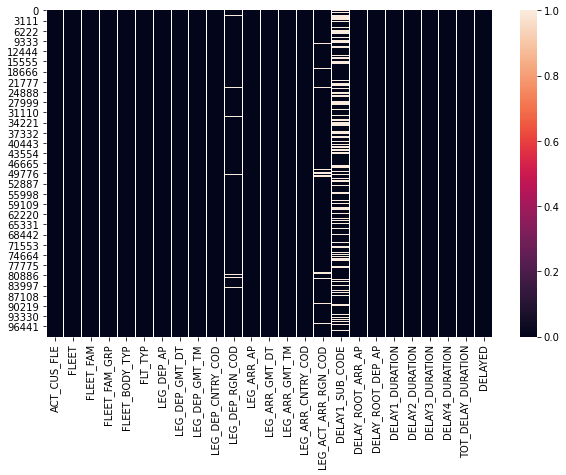

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

In [49]:
#for col in df.select_dtypes('int64'):
#    plt.figure(figsize = (12, 7))
#    sns.distplot(df_delayed[col], label= 'delayed')
#    sns.distplot(df_nondelayed[col], label= 'nondelayed')
#    plt.legend()

In [50]:
df.shape

(99546, 25)

In [51]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(np.NAN,'ND')

In [52]:
df['DELAY1_SUB_CODE'].unique()

array(['ND', 'GN', 'CF', 'OP'], dtype=object)

In [53]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0
1,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,FE,ND,?,?,0,0,0,0,0,0
2,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0
3,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,FE,ND,?,?,0,0,0,0,0,0
4,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0


<AxesSubplot:>

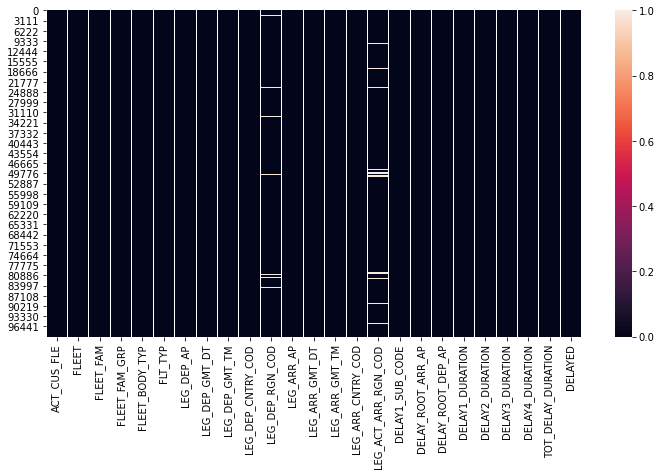

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

<AxesSubplot:ylabel='DELAY1_DURATION'>

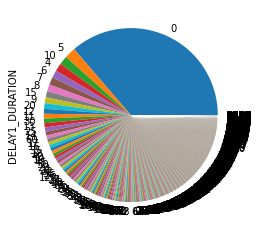

In [49]:
df['DELAY1_DURATION'].value_counts().plot.pie()

In [50]:
df['LEG_DEP_AP'].unique()

array(['IST', 'MAA', 'CMB', 'LCK', 'ORD', 'PRG', 'ISL', 'NBO', 'TNR',
       'ARN', 'STN', 'LOS', 'CMN', 'MXP', 'FIH', 'MST', 'AMS', 'DSS',
       'BRU', 'CAI', 'PNH', 'BOM', 'SIN', 'DAC', 'HKG', 'HAN', 'EBB',
       'JNB', 'WDH', 'ADB', 'CDG', 'DAR', 'SVO', 'MRU', 'SEZ', 'CPT',
       'DXB', 'KWI', 'ECN', 'CAN', 'KHI', 'BKK', 'JFK', 'YYZ', 'BAH',
       'LHE', 'MLE', 'GRU', 'DOH', 'EZE', 'ATL', 'BLR', 'SGN', 'TLV',
       'LAX', 'ESB', 'KUL', 'MSQ', 'OSL', 'ICN', 'IAH', 'HAM', 'MAD',
       'LHR', 'BCN', 'AMM', 'RGN', 'BEY', 'MFM', 'FRA', 'DEL', 'ACC',
       'FRU', 'KBP', 'OTP', 'YUL', 'BOS', 'PVG', 'OPO', 'ALG', 'TUN',
       'DUB', 'AMD', 'LUN', 'LGG', 'ATH', 'KBL', 'MCT', 'DWC', 'ABV',
       'NIM', 'WAW', 'CKY', 'SFO', 'NRT', 'PEK', 'TPE', 'MUX', 'MZR',
       'KAN', 'OUA', 'LEJ', 'ZRH', 'BSL', 'AKX', 'COK', 'HYD', 'TAS',
       'ALA', 'EBL', 'SZX', 'NVI', 'RUH', 'DMM', 'ADD', 'BLL', 'HEL',
       'VIE', 'TBS', 'SNN', 'BUD', 'VNO', 'AUS', 'ABJ', 'KRT', 'AYT',
       'LNZ', 'TEQ',

In [51]:
df["LEG_ACT_ARR_RGN_COD"].value_counts()

DO    36566
FE    22418
EU    18770
EM     7688
EW     2918
NF     2805
EA     2519
SA     1054
ES      598
MA      433
Name: LEG_ACT_ARR_RGN_COD, dtype: int64

In [57]:
df["LEG_ACT_ARR_RGN_COD"].isna().value_counts()

False    95769
True      3777
Name: LEG_ACT_ARR_RGN_COD, dtype: int64

In [58]:
df["LEG_ACT_ARR_RGN_COD"]=df["LEG_ACT_ARR_RGN_COD"].replace(np.NAN,"DO")

<AxesSubplot:>

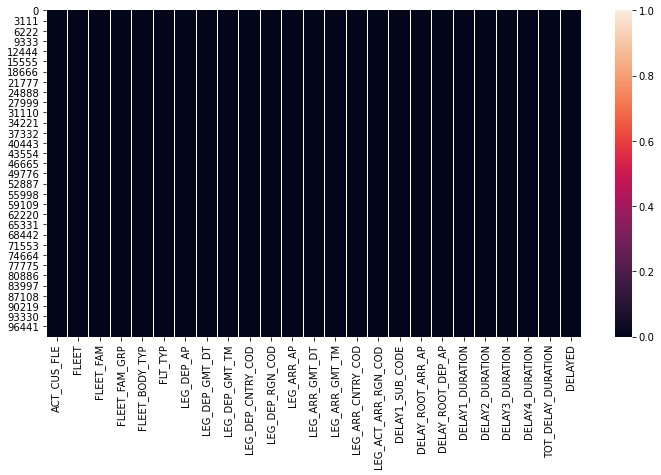

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

In [55]:
df.columns

Index(['FLT_NO', 'ACT_CUS_FLE', 'FLEET', 'FLEET_FAM', 'FLEET_FAM_GRP',
       'FLEET_BODY_TYP', 'FLT_TYP', 'LEG_DEP_AP', 'LEG_DEP_GMT_DT',
       'LEG_DEP_GMT_TM', 'LEG_DEP_CNTRY_COD', 'LEG_DEP_RGN_COD', 'LEG_ARR_AP',
       'LEG_ARR_GMT_DT', 'LEG_ARR_GMT_TM', 'LEG_ARR_CNTRY_COD',
       'LEG_ACT_ARR_RGN_COD', 'DELAY1_SUB_CODE', 'DELAY_ROOT_ARR_AP',
       'DELAY_ROOT_DEP_AP', 'DELAY1_DURATION', 'DELAY2_DURATION',
       'DELAY3_DURATION', 'DELAY4_DURATION', 'TOT_DELAY_DURATION', 'DELAYED'],
      dtype='object')

In [56]:
df['LEG_DEP_RGN_COD'].value_counts()

DO    36688
FE    22406
EU    18748
EM     7637
EW     2916
NF     2776
EA     2516
SA     1054
ES      597
MA      433
Name: LEG_DEP_RGN_COD, dtype: int64

In [57]:
df['LEG_DEP_RGN_COD'].isna().value_counts()

False    95771
True      3775
Name: LEG_DEP_RGN_COD, dtype: int64

In [60]:
df['LEG_DEP_RGN_COD']=df['LEG_DEP_RGN_COD'].replace(np.NAN,"DO")

<AxesSubplot:>

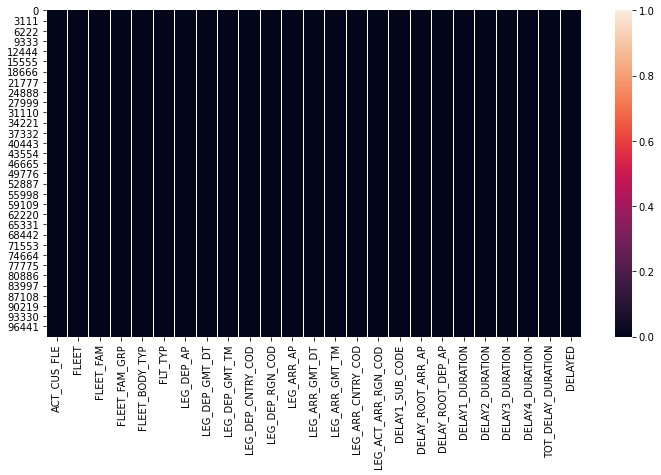

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

In [62]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0
1,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,FE,ND,?,?,0,0,0,0,0,0
2,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0
3,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,FE,ND,?,?,0,0,0,0,0,0
4,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,FE,ND,?,?,0,0,0,0,0,0


In [61]:
df["FLEET"].value_counts()

TX750-20K     48647
TW600-20X     16459
TX650-40      11557
TW650-30Z      8896
TW510-40K      6102
TW510-40KX     3285
TX750-30       2064
TW510-40X      1568
TX500-60K       862
TW800-9          53
TX750-20         16
TX750-34         11
TW500-80          8
TX702-23          7
TX702-20          4
TW500-90Z         4
TX702-27          3
Name: FLEET, dtype: int64

In [62]:
df["FLEET_FAM"].value_counts()

TX750    50738
TW620    16459
TX650    11557
TW540    10955
TW650     8896
TX505      862
TW802       53
TX702       14
TW501        8
TW502        4
Name: FLEET_FAM, dtype: int64

In [63]:
df["FLEET_FAM_GRP"].value_counts()

TX750    50738
TW650    25355
TX650    11557
TW550    10955
TX500      862
TW800       53
TX700       14
TW500       12
Name: FLEET_FAM_GRP, dtype: int64

In [64]:
df["FLT_NO"].value_counts()

FL7458    932
FL7459    927
FL7382    693
FL7431    687
FL7372    672
         ... 
FL7082      1
FL7071      1
FL7782      1
FL7596      1
FL7152      1
Name: FLT_NO, Length: 712, dtype: int64

In [65]:
df["ACT_CUS_FLE"].value_counts()

FL-45S    44768
FL-87S    16459
XYT       11051
FL-87Z     7117
FL-84X     5528
FL-84T     3285
FL-4SX     2538
FL-87N     1769
FL-84B     1568
FL-45T     1199
FL-4RK     1177
XYW         862
FL-45X      622
FL-84S      574
XYZ         506
FL-443      218
FL-45L      164
FL-889       53
FL-45Y       25
FL-442       16
FL-87T       10
FL-441        7
FL-45Z        6
FL-88H        5
FL-45R        5
FL-44K        4
FL-89X        4
FL-88C        3
XYA           3
Name: ACT_CUS_FLE, dtype: int64

In [66]:
df["FLEET"].value_counts()

TX750-20K     48647
TW600-20X     16459
TX650-40      11557
TW650-30Z      8896
TW510-40K      6102
TW510-40KX     3285
TX750-30       2064
TW510-40X      1568
TX500-60K       862
TW800-9          53
TX750-20         16
TX750-34         11
TW500-80          8
TX702-23          7
TX702-20          4
TW500-90Z         4
TX702-27          3
Name: FLEET, dtype: int64

In [63]:
df.corr()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
LEG_DEP_GMT_DT,1.000000,-0.006977,0.997389,0.001440,0.014400,0.007322,0.010371,0.003583,0.016073,0.038565
LEG_DEP_GMT_TM,-0.006977,1.000000,-0.006555,0.132631,0.003196,-0.000999,-0.000693,0.001398,0.002739,0.034727
LEG_ARR_GMT_DT,0.997389,-0.006555,1.000000,0.000939,0.014074,0.007420,0.010401,0.003603,0.015794,0.038789
LEG_ARR_GMT_TM,0.001440,0.132631,0.000939,1.000000,0.000720,-0.001825,0.003490,-0.002153,0.000481,0.002908
DELAY1_DURATION,0.014400,0.003196,0.014074,0.000720,1.000000,0.125978,0.043386,0.025752,0.966488,0.304681
DELAY2_DURATION,0.007322,-0.000999,0.007420,-0.001825,0.125978,1.000000,0.147386,0.065578,0.360056,0.137525
DELAY3_DURATION,0.010371,-0.000693,0.010401,0.003490,0.043386,0.147386,1.000000,0.156416,0.161232,0.069182
DELAY4_DURATION,0.003583,0.001398,0.003603,-0.002153,0.025752,0.065578,0.156416,1.000000,0.080938,0.030901
TOT_DELAY_DURATION,0.016073,0.002739,0.015794,0.000481,0.966488,0.360056,0.161232,0.080938,1.000000,0.322403
DELAYED,0.038565,0.034727,0.038789,0.002908,0.304681,0.137525,0.069182,0.030901,0.322403,1.000000


In [68]:
df.drop(["LEG_ARR_GMT_TM","LEG_ARR_GMT_DT"], axis=1, inplace=True)

In [64]:
df.shape

(99546, 25)

In [70]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,ND,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,ND,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0


In [71]:
df["DELAY_ROOT_ARR_AP"].value_counts()

?      94834
FRU      534
IST      420
ALA      384
MST      233
       ...  
NJF        2
SOF        2
INI        2
ORD        1
BSL        1
Name: DELAY_ROOT_ARR_AP, Length: 76, dtype: int64

In [72]:
df["DELAY_ROOT_DEP_AP"].value_counts()

?      94834
IST     3716
PVG      119
HKG       84
ALA       54
       ...  
SGN        2
JFK        1
TBS        1
MGQ        1
KGF        1
Name: DELAY_ROOT_DEP_AP, Length: 65, dtype: int64

In [73]:
df.drop(["DELAY_ROOT_DEP_AP","DELAY_ROOT_ARR_AP"], axis=1, inplace=True)

In [74]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ARR_AP,LEG_ARR_CNTRY_COD,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,MAA,IN,FE,ND,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,MAA,IN,FE,ND,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,MAA,IN,FE,ND,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,MAA,IN,FE,ND,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,MAA,IN,FE,ND,0,0,0,0,0,0


In [75]:
df.corr()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
LEG_DEP_GMT_DT,1.000000,-0.006977,0.014400,0.007322,0.010371,0.003583,0.016073,0.038565
LEG_DEP_GMT_TM,-0.006977,1.000000,0.003196,-0.000999,-0.000693,0.001398,0.002739,0.034727
DELAY1_DURATION,0.014400,0.003196,1.000000,0.125978,0.043386,0.025752,0.966488,0.304681
DELAY2_DURATION,0.007322,-0.000999,0.125978,1.000000,0.147386,0.065578,0.360056,0.137525
DELAY3_DURATION,0.010371,-0.000693,0.043386,0.147386,1.000000,0.156416,0.161232,0.069182
DELAY4_DURATION,0.003583,0.001398,0.025752,0.065578,0.156416,1.000000,0.080938,0.030901
TOT_DELAY_DURATION,0.016073,0.002739,0.966488,0.360056,0.161232,0.080938,1.000000,0.322403
DELAYED,0.038565,0.034727,0.304681,0.137525,0.069182,0.030901,0.322403,1.000000


In [65]:
df.drop(["DELAY1_DURATION","DELAY2_DURATION","DELAY3_DURATION","DELAY4_DURATION"], axis=1, inplace=True)

In [66]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ARR_AP,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,LEG_ARR_CNTRY_COD,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,TOT_DELAY_DURATION,DELAYED
0,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0
1,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,MAA,5,22,IN,FE,ND,?,?,0,0
2,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0
3,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,MAA,5,22,IN,FE,ND,?,?,0,0
4,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0


In [78]:
df["DELAY1_SUB_CODE"].value_counts()

CF    36277
ND    36147
GN    18824
OP     8298
Name: DELAY1_SUB_CODE, dtype: int64

In [79]:
df.drop(["LEG_ARR_AP","LEG_ARR_CNTRY_COD","LEG_ACT_ARR_RGN_COD"], axis=1, inplace=True)

In [80]:
df.shape

(99546, 15)

In [81]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,LEG_DEP_RGN_COD,DELAY1_SUB_CODE,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,DO,ND,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,DO,ND,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,DO,ND,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,DO,ND,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,DO,ND,0,0


In [67]:
df.corr()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,TOT_DELAY_DURATION,DELAYED
LEG_DEP_GMT_DT,1.000000,-0.006977,0.997389,0.001440,0.016073,0.038565
LEG_DEP_GMT_TM,-0.006977,1.000000,-0.006555,0.132631,0.002739,0.034727
LEG_ARR_GMT_DT,0.997389,-0.006555,1.000000,0.000939,0.015794,0.038789
LEG_ARR_GMT_TM,0.001440,0.132631,0.000939,1.000000,0.000481,0.002908
TOT_DELAY_DURATION,0.016073,0.002739,0.015794,0.000481,1.000000,0.322403
DELAYED,0.038565,0.034727,0.038789,0.002908,0.322403,1.000000


<AxesSubplot:ylabel='FLT_NO'>

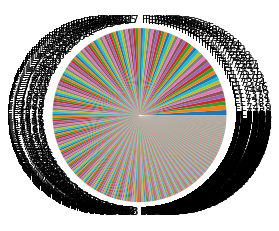

In [83]:
df["FLT_NO"].value_counts().plot.pie()

<AxesSubplot:ylabel='ACT_CUS_FLE'>

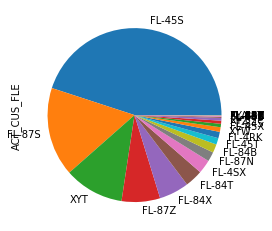

In [84]:
df["ACT_CUS_FLE"].value_counts().plot.pie()

In [85]:
df.drop("FLT_NO", axis=1, inplace=True)

In [86]:
df.shape

(99546, 14)

<AxesSubplot:ylabel='FLEET'>

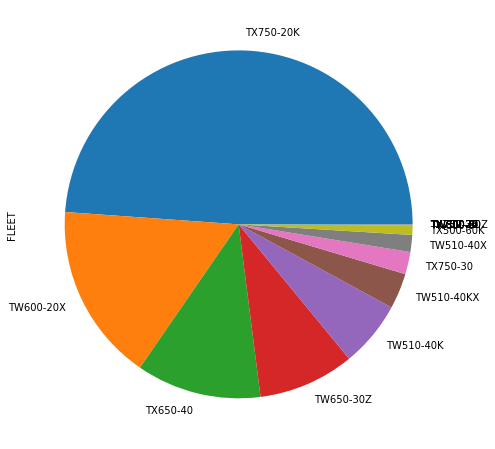

In [87]:
plt.figure(figsize=(8,8))
df["FLEET"].value_counts().plot.pie()

<AxesSubplot:ylabel='FLEET_FAM'>

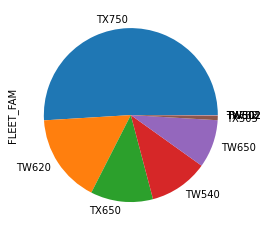

In [88]:
df["FLEET_FAM"].value_counts().plot.pie()

<AxesSubplot:ylabel='FLEET_FAM_GRP'>

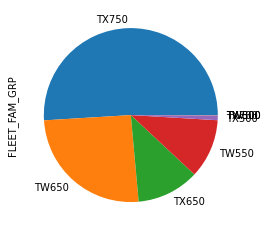

In [89]:
df["FLEET_FAM_GRP"].value_counts().plot.pie()

In [90]:
from scipy.stats import chi2_contingency


In [91]:
obs=df[["FLEET_FAM_GRP","FLEET_FAM"]]
#chi2_contingency(obs)


In [92]:
df[["FLEET_FAM_GRP","FLEET_FAM"]]

,FLEET_FAM_GRP,FLEET_FAM
0,TX750,TX750
1,TX750,TX750
2,TX750,TX750
3,TX750,TX750
4,TX750,TX750
...,...,...
99541,TX750,TX750
99542,TX750,TX750
99543,TX750,TX750
99544,TX750,TX750


In [93]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FLEET_FAM_GRP  99546 non-null  object
 1   FLEET_FAM      99546 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [94]:
crosstab = pd.crosstab(df["FLEET_FAM_GRP"], df["FLEET_FAM"])
crosstab

FLEET_FAM,TW501,TW502,TW540,TW620,TW650,TW802,TX505,TX650,TX702,TX750
FLEET_FAM_GRP,,,,,,,,,,
TW500,8,4,0,0,0,0,0,0,0,0
TW550,0,0,10955,0,0,0,0,0,0,0
TW650,0,0,0,16459,8896,0,0,0,0,0
TW800,0,0,0,0,0,53,0,0,0,0
TX500,0,0,0,0,0,0,862,0,0,0
TX650,0,0,0,0,0,0,0,11557,0,0
TX700,0,0,0,0,0,0,0,0,14,0
TX750,0,0,0,0,0,0,0,0,0,50738


In [95]:
import scipy.stats as stats

In [96]:
stats.chi2_contingency(crosstab)

(696822.0,
 0.0,
 63,
 array([[9.64378277e-04, 4.82189139e-04, 1.32059550e+00, 1.98408776e+00,
         1.07238864e+00, 6.38900609e-03, 1.03911759e-01, 1.39316497e+00,
         1.68766199e-03, 6.11632813e+00],
        [8.80397002e-01, 4.40198501e-01, 1.20559365e+03, 1.81130678e+03,
         9.79001467e+02, 5.83263014e+00, 9.48627770e+01, 1.27184352e+03,
         1.54069475e+00, 5.58369789e+03],
        [2.03765094e+00, 1.01882547e+00, 2.79030825e+03, 4.19221209e+03,
         2.26586784e+03, 1.34994374e+01, 2.19556888e+02, 2.94364148e+03,
         3.56588914e+00, 1.29232916e+04],
        [4.25933739e-03, 2.12966870e-03, 5.83263014e+00, 8.76305427e+00,
         4.73638318e+00, 2.82181102e-02, 4.58943604e-01, 6.15314528e+00,
         7.45384044e-03, 2.70137826e+01],
        [6.92745063e-02, 3.46372531e-02, 9.48627770e+01, 1.42523637e+02,
         7.70332510e+01, 4.58943604e-01, 7.46432805e+00, 1.00075684e+02,
         1.21230386e-01, 4.39356237e+02],
        [9.28776646e-01, 4.64388323e-0

In [68]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ARR_AP,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,LEG_ARR_CNTRY_COD,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,TOT_DELAY_DURATION,DELAYED
0,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0
1,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,MAA,5,22,IN,FE,ND,?,?,0,0
2,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0
3,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,TR,...,MAA,5,22,IN,FE,ND,?,?,0,0
4,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,TR,...,MAA,5,19,IN,FE,ND,?,?,0,0


In [69]:
#Feature Selection for Categorical values - chi square testing
#First-->label encoding before chi square testing

In [70]:
ordinal_label={k: i for i, k in enumerate(df["ACT_CUS_FLE"].unique(),1)}

In [71]:
ordinal_label

{'FL-45X': 1,
 'FL-87N': 2,
 'FL-45T': 3,
 'FL-87Z': 4,
 'FL-443': 5,
 'XYT': 6,
 'FL-45S': 7,
 'FL-87S': 8,
 'FL-441': 9,
 'FL-442': 10,
 'FL-44K': 11,
 'XYA': 12,
 'FL-87T': 13,
 'FL-889': 14,
 'FL-45Y': 15,
 'FL-88C': 16,
 'FL-45Z': 17,
 'FL-45R': 18,
 'FL-88H': 19,
 'FL-89X': 20,
 'FL-84T': 21,
 'FL-84B': 22,
 'FL-84X': 23,
 'XYZ': 24,
 'XYW': 25,
 'FL-45L': 26,
 'FL-84S': 27,
 'FL-4RK': 28,
 'FL-4SX': 29}

In [72]:
df["ACT_CUS_FLE"]=df["ACT_CUS_FLE"].map(ordinal_label)

In [73]:
df.tail()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ARR_AP,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,LEG_ARR_CNTRY_COD,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,TOT_DELAY_DURATION,DELAYED
99541,29,TX750-20K,TX750,TX750,B1,TYP2,HKG,2,5,HK,...,ALA,2,12,KZ,FE,GN,?,?,119,1
99542,29,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,4,HK,...,ALA,3,11,KZ,FE,GN,?,?,56,1
99543,29,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,HK,...,ALA,3,10,KZ,FE,CF,?,?,20,1
99544,29,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,6,HK,...,ALA,3,13,KZ,FE,GN,?,?,221,1
99545,29,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,HK,...,ALA,3,10,KZ,FE,CF,?,?,45,1


In [74]:
df.columns

Index(['ACT_CUS_FLE', 'FLEET', 'FLEET_FAM', 'FLEET_FAM_GRP', 'FLEET_BODY_TYP',
       'FLT_TYP', 'LEG_DEP_AP', 'LEG_DEP_GMT_DT', 'LEG_DEP_GMT_TM',
       'LEG_DEP_CNTRY_COD', 'LEG_DEP_RGN_COD', 'LEG_ARR_AP', 'LEG_ARR_GMT_DT',
       'LEG_ARR_GMT_TM', 'LEG_ARR_CNTRY_COD', 'LEG_ACT_ARR_RGN_COD',
       'DELAY1_SUB_CODE', 'DELAY_ROOT_ARR_AP', 'DELAY_ROOT_DEP_AP',
       'TOT_DELAY_DURATION', 'DELAYED'],
      dtype='object')

In [75]:
ordinal_label1={k: i for i, k in enumerate(df['FLEET'].unique(),1)}

In [76]:
ordinal_label2={k: i for i, k in enumerate(df['FLEET_FAM'].unique(),1)}
ordinal_label3={k: i for i, k in enumerate(df['FLEET_FAM_GRP'].unique(),1)}
ordinal_label4={k: i for i, k in enumerate(df['FLEET_BODY_TYP'].unique(),1)}
ordinal_label5={k: i for i, k in enumerate(df['FLT_TYP'].unique(),1)}
ordinal_label6={k: i for i, k in enumerate(df['LEG_DEP_AP'].unique(),1)}
ordinal_label7={k: i for i, k in enumerate(df['LEG_DEP_CNTRY_COD'].unique(),1)}
ordinal_label8={k: i for i, k in enumerate(df['LEG_DEP_RGN_COD'].unique(),1)}
ordinal_label9={k: i for i, k in enumerate(df['DELAY1_SUB_CODE'].unique(),1)}


In [77]:
df['FLEET']=df['FLEET'].map(ordinal_label1)
df['FLEET_FAM']=df['FLEET_FAM'].map(ordinal_label2)
df['FLEET_FAM_GRP']=df['FLEET_FAM_GRP'].map(ordinal_label3)
df['FLEET_BODY_TYP']=df['FLEET_BODY_TYP'].map(ordinal_label4)
df['FLT_TYP']=df['FLT_TYP'].map(ordinal_label5)
df['LEG_DEP_AP']=df['LEG_DEP_AP'].map(ordinal_label6)
df['LEG_DEP_CNTRY_COD']=df['LEG_DEP_CNTRY_COD'].map(ordinal_label7)
df['LEG_DEP_RGN_COD']=df['LEG_DEP_RGN_COD'].map(ordinal_label8)
df['DELAY1_SUB_CODE']=df['DELAY1_SUB_CODE'].map(ordinal_label9)


In [78]:
df.head()

,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,...,LEG_ARR_AP,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,LEG_ARR_CNTRY_COD,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,TOT_DELAY_DURATION,DELAYED
0,1,1,1,1,1,1,1,5,12,1,...,MAA,5,19,IN,FE,1,?,?,0,0
1,1,1,1,1,1,1,1,5,15,1,...,MAA,5,22,IN,FE,1,?,?,0,0
2,1,1,1,1,1,1,1,5,12,1,...,MAA,5,19,IN,FE,1,?,?,0,0
3,1,1,1,1,1,1,1,5,15,1,...,MAA,5,22,IN,FE,1,?,?,0,0
4,1,1,1,1,1,1,1,5,12,1,...,MAA,5,19,IN,FE,1,?,?,0,0


In [79]:
df.drop(['FLEET', 'FLEET_FAM', 'FLEET_FAM_GRP'],axis=1, inplace=True)

In [81]:
df.drop(['LEG_ARR_AP', 'LEG_ARR_CNTRY_COD', 'LEG_ACT_ARR_RGN_COD','TOT_DELAY_DURATION'],axis=1, inplace=True)

In [85]:
df.drop(['DELAY_ROOT_ARR_AP', 'DELAY_ROOT_DEP_AP'],axis=1, inplace=True)

In [86]:
df.head()

,ACT_CUS_FLE,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_DEP_CNTRY_COD,LEG_DEP_RGN_COD,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_SUB_CODE,DELAYED
0,1,1,1,1,5,12,1,1,5,19,1,0
1,1,1,1,1,5,15,1,1,5,22,1,0
2,1,1,1,1,5,12,1,1,5,19,1,0
3,1,1,1,1,5,15,1,1,5,22,1,0
4,1,1,1,1,5,12,1,1,5,19,1,0


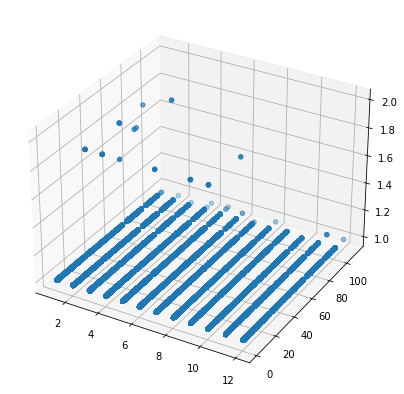

In [89]:
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LEG_DEP_GMT_DT'], df['LEG_DEP_CNTRY_COD'], df['FLEET_BODY_TYP'])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("DELAYED", axis=1), df["DELAYED"], test_size=0.33, random_state=42)

In [92]:
y_train.value_counts()

1    42423
0    24272
Name: DELAYED, dtype: int64

In [93]:
y_test.value_counts()

1    20976
0    11875
Name: DELAYED, dtype: int64

In [110]:
X_train.isnull().sum()

ACT_CUS_FLE           0
FLEET_BODY_TYP        0
FLT_TYP               0
LEG_DEP_AP            0
LEG_DEP_GMT_DT        0
LEG_DEP_GMT_TM        0
LEG_DEP_CNTRY_COD     0
LEG_DEP_RGN_COD       0
DELAY1_SUB_CODE       0
TOT_DELAY_DURATION    0
dtype: int64

In [111]:
f_p_values= chi2(X_train,y_train)
f_p_values

(array([4.21223009e+03, 5.12505211e-04, 6.75597566e+01, 4.46663852e+03,
        2.11035188e+02, 3.12505182e+02, 7.41242229e+03, 4.27346503e+02,
        2.39960978e+04, 4.84890915e+06]),
 array([0.00000000e+00, 9.81938571e-01, 2.04397276e-16, 0.00000000e+00,
        8.16619339e-48, 6.21576473e-70, 0.00000000e+00, 6.14363605e-95,
        0.00000000e+00, 0.00000000e+00]))

In [112]:
f_scores=pd.Series(f_p_values[0])
p_values=pd.Series(f_p_values[1])

In [113]:
f_scores.sort_index(ascending=True)


0    4.212230e+03
1    5.125052e-04
2    6.755976e+01
3    4.466639e+03
4    2.110352e+02
5    3.125052e+02
6    7.412422e+03
7    4.273465e+02
8    2.399610e+04
9    4.848909e+06
dtype: float64

In [114]:
f_scores.sort_values(ascending=False)

9    4.848909e+06
8    2.399610e+04
6    7.412422e+03
3    4.466639e+03
0    4.212230e+03
7    4.273465e+02
5    3.125052e+02
4    2.110352e+02
2    6.755976e+01
1    5.125052e-04
dtype: float64

In [115]:
p_values.sort_values(ascending=True)

0    0.000000e+00
3    0.000000e+00
6    0.000000e+00
8    0.000000e+00
9    0.000000e+00
7    6.143636e-95
5    6.215765e-70
4    8.166193e-48
2    2.043973e-16
1    9.819386e-01
dtype: float64

In [116]:
p_values.sort_index(ascending=True)

0    0.000000e+00
1    9.819386e-01
2    2.043973e-16
3    0.000000e+00
4    8.166193e-48
5    6.215765e-70
6    0.000000e+00
7    6.143636e-95
8    0.000000e+00
9    0.000000e+00
dtype: float64

<AxesSubplot:>

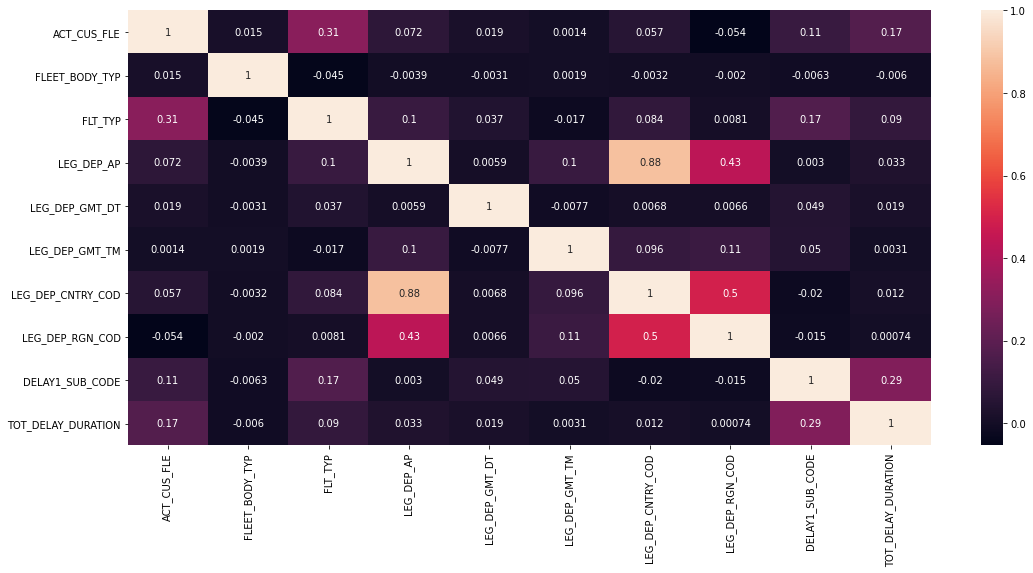

In [117]:
plt.figure(figsize=(18,8))
sns.heatmap(X_train.corr(),annot=True)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [107]:
from sklearn.impute import SimpleImputer

In [108]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)

SimpleImputer()

In [109]:
X_train = imputer.transform(X_train)
X_test =  imputer.transform(X_test)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly.fit(X_train)
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

In [116]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=10)
select.fit(X_train,y_train)

SelectKBest()

In [117]:
X_train = select.transform(X_train)
X_test = select.transform(X_test)

In [118]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9999695595263463

In [121]:
model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    StandardScaler(),
    PolynomialFeatures(degree = 2),
    SelectKBest(f_classif, k=10),
    KNeighborsClassifier(n_neighbors=4)
                )

In [119]:
#model = make_pipeline(LogisticRegression(),GaussianNB(), svm,
#                      RandomForestClassifier(random_state=0))

In [120]:
#from sklearn.feature_selection import SelectKBest, f_regression
#Knn =  make_pipeline(df, PolynomialFeatures(degree=2),SelectKBest(f_regression, k = 70),
#                      KNeighborsClassifier())

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evalution(model, score = 'f1'):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=score,train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()